In [1]:
# Importing necssary modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
        f1_score, classification_report, 
        confusion_matrix, roc_curve, 
        roc_auc_score, accuracy_score,
        log_loss)
from sklearn import __version__ as sklearn_version
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss
from datetime import datetime
from scripts.utils import load_data, load_data_multi_label, load_data_all, load_data_class, load_data_all_multi

In [2]:
# Data folder path and Extention of the data files
base_directory = '../rawdata'
file_extension = "*.csv"

#### Loading Device Data into pandas Dataframe

In [3]:
# Doorbells
danmini_doorbell_df = load_data(base_directory, file_extension, 'Danmini_Doorbell')
ennio_doorbell_df = load_data(base_directory, file_extension, 'Ennio_Doorbell')

In [4]:
# Ecobee Thermostat
ecobee_thermostat_df = load_data(base_directory, file_extension, 'Ecobee_Thermostat')

In [5]:
# Web cam
samsung_cam_df = load_data(base_directory, file_extension, 'Samsung_SNH_1011_N_Webcam')

In [6]:
# Baby monitor
baby_monitor_df = load_data(base_directory, file_extension, 'Philips_B120N10_Baby_Monitor')

In [7]:
# Security cam
provision_cam1_df = load_data(base_directory, file_extension, 'Provision_PT_737E_Security_Camera')
provision_cam2_df = load_data(base_directory, file_extension, 'Provision_PT_838_Security_Camera')
simplehome_cam1_df = load_data(base_directory, file_extension, 'SimpleHome_XCS7_1002_WHT_Security_Camera')
simplehome_cam2_df = load_data(base_directory, file_extension, 'SimpleHome_XCS7_1003_WHT_Security_Camera')

#### Checking out Missing values

In [8]:
danmini_doorbell_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [9]:
ecobee_thermostat_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [10]:
ennio_doorbell_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [11]:
baby_monitor_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [12]:
provision_cam1_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [13]:
provision_cam2_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [14]:
samsung_cam_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [15]:
simplehome_cam1_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

In [16]:
simplehome_cam2_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
label                    0
device                   0
Length: 117, dtype: int64

#### Creating dict to store values of DF

In [17]:
dataframe = {"Danmin Door Bell": danmini_doorbell_df, 
            "Ecobee_Thermostat": ecobee_thermostat_df,
            "Ennio_Doorbell": ennio_doorbell_df,
            "Philips_B120N10_Baby_Monitor": baby_monitor_df,
            "Provision_PT_737E_Security_Camera": provision_cam1_df,
            "Provision_PT_838_Security_Camera": provision_cam2_df,
            "Samsung_SNH_1011_N_Webcam": samsung_cam_df,
            "SimpleHome_XCS7_1002_WHT_Security_Camera": simplehome_cam1_df,
            "SimpleHome_XCS7_1003_WHT_Security_Camera": simplehome_cam2_df
            }

#### Dummy classifier

In [14]:
def dummy_classifier(data, scaling=False):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    
    strat = ["most_frequent", "stratified", "constant", "uniform"]
    
    for s in strat:
        if s == 'constant':
            dummy_clf = DummyClassifier(strategy =s , constant='benign')
        else:
            dummy_clf = DummyClassifier(strategy=s)
        
        dummy_clf.fit(X_train, y_train)
        print(s)
        print(dummy_clf.predict(X_test))
        print(dummy_clf.score(X_test, y_test))
        print("----------------------Done----------------------")

In [16]:
# without scaling
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dummy_classifier(dataframe[k])

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
most_frequent
['mirai' 'mirai' 'mirai' ... 'mirai' 'mirai' 'mirai']
0.6403744803430554
----------------------xxxxxxx----------------------
stratified
['mirai' 'mirai' 'mirai' ... 'mirai' 'gafgyt' 'gafgyt']
0.5097319061180399
----------------------xxxxxxx----------------------
constant
['benign' 'benign' 'benign' ... 'benign' 'benign' 'benign']
0.049111263871157815
----------------------xxxxxxx----------------------
uniform
['mirai' 'benign' 'mirai' ... 'gafgyt' 'benign' 'benign']
0.33316638842515306
----------------------xxxxxxx----------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat
----------------------xxxxxxx----------------------
most_frequent
['mirai' 'mirai' 'mirai' ... 'mirai' 'mirai' 'mirai']
0.6138904064794248
----------------------xxxxxxx----------------------
stratified
['mirai' 'gafgyt' 'mirai' ... 'mirai' 'mirai' 'gaf

| Device | Most Frequent | Stratified | Constant | Uniform |
|---|---|---|---|---|
| Danmin Door Bell  | 0.64 | 0.51 | 0.049 | 0.33 |
| Ecobee_Thermostat | 0.61  | 0.51 | 0.016 | 0.33 |
| Ennio_Doorbell | 0.89 | 0.80 | 0.11 | 0.50 |
| Philips_B120N10_Baby_Monitor | 0.55 | 0.41 | 0.15 | 0.33 |
| Provision_PT_737E_Security_Camera | 0.52 | 0.44 | 0.075  | 0.33 |
| Provision_PT_838_Security_Camera | 0.51  | 0.41 | 0.11 | 0.33  |
| Samsung_SNH_1011_N_Webcam | 0.86 | 0.76 | 0.13 | 0.49  |
| SimpleHome_XCS7_1002_WHT_Security_Camera | 0.59 | 0.48 | 0.054 | 0.33 |
| SimpleHome_XCS7_1003_WHT_Security_Camera | 0.60  | 0.50 | 0.023 | 0.33 |

In [17]:
# with scaling
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dummy_classifier(dataframe[k], True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
most_frequent
['mirai' 'mirai' 'mirai' ... 'mirai' 'mirai' 'mirai']
0.6403744803430554
----------------------xxxxxxx----------------------
stratified
['mirai' 'gafgyt' 'mirai' ... 'mirai' 'gafgyt' 'mirai']
0.5086320337817932
----------------------xxxxxxx----------------------
constant
['benign' 'benign' 'benign' ... 'benign' 'benign' 'benign']
0.049111263871157815
----------------------xxxxxxx----------------------
uniform
['gafgyt' 'benign' 'benign' ... 'mirai' 'gafgyt' 'benign']
0.33267210055975643
----------------------xxxxxxx----------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat
----------------------xxxxxxx----------------------
most_frequent
['mirai' 'mirai' 'mirai' ... 'mirai' 'mirai' 'mirai']
0.6138904064794248
----------------------xxxxxxx----------------------
stratified
['mirai' 'mirai' 'mirai' ... 'mirai' 'mirai' 'mir

| Device | Most Frequent | Stratified | Constant | Uniform |
|---|---|---|---|---|
| Danmin Door Bell  | 0.64 | 0.51 | 0.049 | 0.33 |
| Ecobee_Thermostat | 0.61  | 0.51 | 0.016 | 0.33 |
| Ennio_Doorbell | 0.89 | 0.80 | 0.11 | 0.50 |
| Philips_B120N10_Baby_Monitor | 0.55 | 0.41 | 0.15 | 0.33 |
| Provision_PT_737E_Security_Camera | 0.52 | 0.44 | 0.075  | 0.33 |
| Provision_PT_838_Security_Camera | 0.51  | 0.41 | 0.11 | 0.33  |
| Samsung_SNH_1011_N_Webcam | 0.86 | 0.76 | 0.13 | 0.49  |
| SimpleHome_XCS7_1002_WHT_Security_Camera | 0.59 | 0.48 | 0.054 | 0.33 |
| SimpleHome_XCS7_1003_WHT_Security_Camera | 0.60  | 0.50 | 0.023 | 0.33 |

#### Random Forest Classifier

In [11]:
def rf_classifier(data, device_name, scaling=False,):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        model_name = f'{device_name}_without_scaling_unbalanced_model.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'{device_name}_with_scaling_unbalanced_model.pkl'
    
    clf = RandomForestClassifier()
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [19]:
# with out scaling
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier(dataframe[k], k)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                     importance
feature                        
MI_dir_L0.01_weight       0.067
H_L0.01_weight            0.054
MI_dir_L0.01_mean         0.052
MI_dir_L0.1_weight        0.050
H_L0.1_weight             0.048
MI_dir_L3_weight          0.046
MI_dir_L1_weight          0.039
H_L3_weight               0.035
H_L1_weight               0.028
MI_dir_L5_weight          0.027
HH_L1_weight              0.025
HH_jit_L1_weight          0.024
HH_jit_L3_mean            0.023
HH_jit_L3_weight          0.023
MI_dir_L5_variance        0.023
H_L5_weight               0.021
H_L0.01_mean              0.021
HH_L3_weight              0.018
HH_L0.1_weight            0.017
H_L1_mean                 0.017
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[ 15000      3      0]
 [     6  94853  

In [22]:
# with scaling
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier(dataframe[k], k, True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                     importance
feature                        
H_L0.1_weight             0.076
H_L0.01_weight            0.069
H_L1_weight               0.062
MI_dir_L0.01_weight       0.058
MI_dir_L0.1_weight        0.050
MI_dir_L1_weight          0.046
MI_dir_L0.01_mean         0.038
MI_dir_L3_weight          0.036
H_L0.1_mean               0.030
HH_L3_weight              0.029
HH_jit_L3_weight          0.025
HH_L0.01_magnitude        0.024
H_L0.01_mean              0.021
H_L3_weight               0.020
MI_dir_L5_weight          0.019
MI_dir_L0.1_mean          0.019
HH_L0.1_weight            0.018
H_L5_weight               0.017
HH_L1_weight              0.016
HH_jit_L0.1_weight        0.016
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[ 15002      1      0]
 [     9  94850  

In [23]:
def rf_classifier_balanced(data, device_name, scaling=False):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    nm = NearMiss()
    
    X_res, y_res = nm.fit_resample(X, y)
    print(f'Imblearn Shape:{X_res.shape}, {y_res.shape}')
    
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
        model_name = f'{device_name}_without_scaling_balanced_model.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'{device_name}_with_scaling_balanced_model.pkl'
    
    clf = RandomForestClassifier()
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [24]:
# with out scaling and balanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier_balanced(dataframe[k], k)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(148644, 115), (148644,)
                      importance
feature                         
HH_jit_L0.01_mean          0.097
HH_jit_L1_mean             0.075
HH_jit_L0.1_mean           0.075
H_L0.01_mean               0.072
HH_jit_L3_mean             0.070
HH_jit_L5_mean             0.068
MI_dir_L0.1_weight         0.035
HH_L0.01_magnitude         0.031
H_L0.1_weight              0.030
HpHp_L5_magnitude          0.030
MI_dir_L0.01_weight        0.029
H_L0.01_weight             0.029
HpHp_L0.01_magnitude       0.025
HH_L0.1_magnitude          0.025
HH_jit_L0.01_weight        0.025
MI_dir_L0.01_mean          0.024
HpHp_L1_magnitude          0.022
HH_L1_magnitude            0.017
H_L1_weight                0.017
HpHp_L3_magnitude          0.015
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Fore

In [25]:
# with scaling and balanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier_balanced(dataframe[k], k, True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(148644, 115), (148644,)
                    importance
feature                       
HH_jit_L5_mean           0.097
HH_jit_L0.01_mean        0.082
HH_jit_L3_mean           0.075
HH_jit_L0.1_mean         0.075
HH_jit_L1_mean           0.060
MI_dir_L0.01_mean        0.058
HH_L5_magnitude          0.055
MI_dir_L0.1_weight       0.048
H_L0.1_weight            0.047
HH_L0.1_magnitude        0.040
HpHp_L5_magnitude        0.031
HH_L3_magnitude          0.026
HH_L1_magnitude          0.023
MI_dir_L3_weight         0.022
H_L0.01_mean             0.020
HpHp_L3_magnitude        0.020
HpHp_L1_magnitude        0.015
HH_L0.01_magnitude       0.015
MI_dir_L5_weight         0.015
HH_L0.01_mean            0.014
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[14849     0     0]
 [

#### KNN

In [11]:
def knn_classifier_unbalanced(data, scaling=False):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    test_scores = []
    train_scores = []
    error = []
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    #neighbors = list(range(1,10))
    #for i in neighbors:
    knn = KNeighborsClassifier(3)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    error.append(np.mean(y_pred != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    print(f'Accuracy on Training set:{train_scores}')
    print(f'Accuracy on Test set:{test_scores}')

In [25]:
# without  scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    knn_classifier_unbalanced(dataframe[k])

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
[[ 14871     33     99]
 [    93  94724     42]
 [   108     33 195487]]
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99     15003
      gafgyt       1.00      1.00      1.00     94859
       mirai       1.00      1.00      1.00    195628

    accuracy                           1.00    305490
   macro avg       1.00      1.00      1.00    305490
weighted avg       1.00      1.00      1.00    305490

Accuracy on Training set:[0.9991835108472408]
Accuracy on Test set:[0.9986644407345576]
----------------------xxxxxxx----------------------
Ecobee_Thermostat
----------------------xxxxxxx----------------------
Original Shape:(835876, 115), (835876,)
[[  3879     54     83]
 [    36  92732     38]
 [    29     23 153889]]
              precision    recall  f1-score   support

     

In [ ]:
# with  scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    knn_classifier_unbalanced(dataframe[k], True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)


In [ ]:
def knn_classifier_balanced(data, scaling=False):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    nm = NearMiss()
    
    X_res, y_res = nm.fit_resample(X, y)
    print(f'Imblearn Shape:{X_res.shape}, {y_res.shape}')
    
    test_scores = []
    train_scores = []
    error = []
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    #neighbors = list(range(1,10))
    #for i in neighbors:
    knn = KNeighborsClassifier(3)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    error.append(np.mean(y_pred != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    print(f'Accuracy on Training set:{train_scores}')
    print(f'Accuracy on Test set:{test_scores}')

In [ ]:
# without  scaling and balanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    knn_classifier_balanced(dataframe[k])

In [ ]:
# with scaling and balanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    knn_classifier_balanced(dataframe[k], True)

#### Loading data with multi label

In [26]:
danmini_doorbell_multi_df = load_data_multi_label(base_directory, file_extension, 'Danmini_Doorbell')
ecobee_thermostat_multi_df = load_data_multi_label(base_directory, file_extension, 'Ecobee_Thermostat')
ennio_doorbell_multi_df = load_data_multi_label(base_directory, file_extension, 'Ennio_Doorbell')
baby_monitor_multi_df = load_data_multi_label(base_directory, file_extension, 'Philips_B120N10_Baby_Monitor')
provision_cam1_multi_df = load_data_multi_label(base_directory, file_extension, 'Provision_PT_737E_Security_Camera')
provision_cam2_multi_df = load_data_multi_label(base_directory, file_extension, 'Provision_PT_838_Security_Camera')
samsung_cam_multi_df = load_data_multi_label(base_directory, file_extension, 'Samsung_SNH_1011_N_Webcam')
simplehome_cam1_multi_df = load_data_multi_label(base_directory, file_extension, 'SimpleHome_XCS7_1002_WHT_Security_Camera')
simplehome_cam2_multi_df = load_data_multi_label(base_directory, file_extension, 'SimpleHome_XCS7_1003_WHT_Security_Camera')

In [27]:
dataframe_multi = {"DanminDoorBell_multi ": danmini_doorbell_multi_df, 
            "Ecobee_Thermostat_multi": ecobee_thermostat_multi_df,
            "Ennio_Doorbell_multi": ennio_doorbell_multi_df,
            "Philips_B120N10_Baby_Monitor_multi": baby_monitor_multi_df,
            "Provision_PT_737E_Security_Camera_multi": provision_cam1_multi_df,
            "Provision_PT_838_Security_Camera_multi": provision_cam2_multi_df,
            "Samsung_SNH_1011_N_Webcam_multi": samsung_cam_multi_df,
            "SimpleHome_XCS7_1002_WHT_Security_Camera_multi": simplehome_cam1_multi_df,
            "SimpleHome_XCS7_1003_WHT_Security_Camera_multi": simplehome_cam2_multi_df
            }

In [28]:
# with out scaling unbalanced data
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier(dataframe_multi[k], k)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
H_L0.1_mean                 0.069
H_L0.01_mean                0.068
MI_dir_L0.1_mean            0.067
MI_dir_L0.01_mean           0.057
H_L0.1_variance             0.049
H_L0.01_variance            0.044
H_L1_mean                   0.042
MI_dir_L1_mean              0.039
MI_dir_L0.1_variance        0.038
HH_jit_L1_mean              0.034
MI_dir_L0.01_variance       0.033
HH_jit_L3_mean              0.028
HH_jit_L5_mean              0.025
HH_jit_L0.1_mean            0.024
HH_jit_L0.01_mean           0.024
MI_dir_L0.1_weight          0.023
MI_dir_L3_mean              0.022
H_L0.1_weight               0.017
H_L1_weight                 0.016
H_L3_mean                   0.015
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion

In [29]:
# with scaling unbalanced data
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier(dataframe_multi[k], k, True)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
H_L0.01_mean                0.089
MI_dir_L0.01_mean           0.072
H_L0.01_variance            0.069
H_L0.1_mean                 0.066
MI_dir_L0.01_variance       0.063
H_L0.1_variance             0.052
MI_dir_L0.1_mean            0.047
MI_dir_L1_mean              0.036
H_L3_mean                   0.030
H_L1_mean                   0.029
MI_dir_L0.1_variance        0.029
MI_dir_L0.01_weight         0.024
H_L0.1_weight               0.023
MI_dir_L1_weight            0.021
MI_dir_L0.1_weight          0.019
H_L0.01_weight              0.018
H_L1_weight                 0.017
HH_L0.1_magnitude           0.014
H_L5_mean                   0.013
MI_dir_L3_mean              0.013
Random Forest: Accuracy=0.910
Random Forest: f1-score=0.878
Random Forest: Confusion

In [30]:
# with out scaling and balanced data
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier_balanced(dataframe_multi[k], k)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(319748, 115), (319748,)
                       importance
feature                          
HH_jit_L0.1_mean            0.064
MI_dir_L0.01_mean           0.062
H_L0.01_mean                0.061
HH_jit_L0.01_mean           0.058
HH_jit_L1_mean              0.054
HH_jit_L3_mean              0.052
HH_jit_L5_mean              0.040
MI_dir_L0.1_mean            0.040
H_L0.01_variance            0.037
H_L0.1_weight               0.036
H_L0.1_mean                 0.035
MI_dir_L0.01_variance       0.030
H_L0.1_variance             0.027
MI_dir_L0.1_weight          0.027
MI_dir_L0.1_variance        0.026
MI_dir_L1_mean              0.024
MI_dir_L0.01_weight         0.019
MI_dir_L1_weight            0.018
H_L1_weight                 0.017
H_L0.01_weight              0.016
Random Forest: Accuracy=1.000
Random Forest:

In [33]:
# with out scaling and balanced data
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier_balanced(dataframe_multi[k], k, True)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(319748, 115), (319748,)
                       importance
feature                          
H_L0.01_mean                0.066
MI_dir_L0.01_mean           0.059
HH_jit_L0.01_mean           0.055
HH_jit_L3_mean              0.043
HH_jit_L1_mean              0.042
MI_dir_L0.01_variance       0.040
H_L0.01_variance            0.038
H_L0.1_variance             0.037
H_L0.1_mean                 0.036
MI_dir_L0.1_mean            0.034
HH_jit_L0.1_mean            0.032
HH_jit_L5_mean              0.032
MI_dir_L0.1_weight          0.027
H_L1_mean                   0.026
H_L0.1_weight               0.024
MI_dir_L0.1_variance        0.023
H_L0.01_weight              0.023
MI_dir_L1_mean              0.019
HH_jit_L0.01_weight         0.019
H_L1_weight                 0.019
Random Forest: Accuracy=0.909
Random Forest:

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8726
  gafgyt_combo       1.00      1.00      1.00      8748
   gafgyt_junk       1.00      1.00      1.00      8723
   gafgyt_scan       1.00      1.00      1.00      8746
    gafgyt_tcp       0.00      0.00      0.00      8745
    gafgyt_udp       0.50      1.00      0.66      8675
     mirai_ack       1.00      1.00      1.00      8685
    mirai_scan       1.00      1.00      1.00      8740
     mirai_syn       1.00      1.00      1.00      8771
     mirai_udp       1.00      1.00      1.00      8695
mirai_udpplain       1.00      1.00      1.00      8671

      accuracy                           0.91     95925
     macro avg       0.86      0.91      0.88     95925
  weighted avg       0.86      0.91      0.88     95925

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report               precision    recall  f1-score   support

      benign       1.00      1.00      1.00      8433
gafgyt_combo       1.00      1.00      1.00      8416
 gafgyt_junk       1.00      1.00      1.00      8409
 gafgyt_scan       1.00      1.00      1.00      8442
  gafgyt_tcp       0.50      1.00      0.66      8387
  gafgyt_udp       0.00      0.00      0.00      8529

    accuracy                           0.83     50616
   macro avg       0.75      0.83      0.78     50616
weighted avg       0.75      0.83      0.78     50616

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Philips_B120N10_Baby_Monitor_multi
----------------------xxxxxxx----------------------
Original Shape:(1098677, 115), (1098677,)
Imblearn Shape:(306449, 115), (306449,)
                       importance
feature                          
HH_jit_L0.01_mean           0.096
HH_jit_L1_mean              0.075
HH_jit_L5_me

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8336
  gafgyt_combo       1.00      1.00      1.00      8403
   gafgyt_junk       1.00      1.00      1.00      8311
   gafgyt_scan       1.00      1.00      1.00      8395
    gafgyt_tcp       0.00      0.00      0.00      8465
    gafgyt_udp       0.50      1.00      0.66      8315
     mirai_ack       1.00      1.00      1.00      8330
    mirai_scan       1.00      1.00      1.00      8476
     mirai_syn       1.00      1.00      1.00      8231
     mirai_udp       1.00      1.00      1.00      8315
mirai_udpplain       1.00      1.00      1.00      8246

      accuracy                           0.91     91823
     macro avg       0.86      0.91      0.88     91823
  weighted avg       0.86      0.91      0.88     91823

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1

#### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
def dt_classifier(data, device_name, scaling=False,):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        model_name = f'{device_name}_without_scaling_unbalanced_model_decision_tree_gini.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'{device_name}_with_scaling_unbalanced_model_decision_tree_gini.pkl'
    
    clf = DecisionTreeClassifier(criterion='gini', random_state= 1234, max_depth  = 5 )
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [37]:
# with out scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier(dataframe[k], k)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
MI_dir_L0.01_weight         0.558
HH_L0.1_weight              0.238
H_L0.01_mean                0.161
HH_jit_L3_weight            0.011
HH_jit_L3_mean              0.010
MI_dir_L0.01_mean           0.007
H_L0.1_mean                 0.006
HH_jit_L0.01_variance       0.003
HH_jit_L1_mean              0.003
HH_jit_L3_variance          0.002
HH_jit_L1_variance          0.001
HH_jit_L0.01_weight         0.000
HpHp_L5_std                 0.000
HpHp_L5_magnitude           0.000
HpHp_L5_mean                0.000
HpHp_L5_radius              0.000
HpHp_L5_weight              0.000
HpHp_L5_covariance          0.000
HH_jit_L0.01_mean           0.000
MI_dir_L5_weight            0.000
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matr

In [38]:
# with scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier(dataframe[k], k, True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
MI_dir_L0.01_weight         0.559
HH_L0.1_weight              0.242
H_L0.01_mean                0.161
HH_jit_L3_weight            0.011
HH_jit_L3_mean              0.010
MI_dir_L0.01_mean           0.007
MI_dir_L0.1_variance        0.007
H_L0.1_weight               0.002
HH_jit_L1_variance          0.001
HH_L0.01_pcc                0.001
HH_jit_L0.01_weight         0.000
HpHp_L5_std                 0.000
HpHp_L5_magnitude           0.000
HpHp_L5_radius              0.000
HpHp_L5_mean                0.000
HpHp_L5_covariance          0.000
HpHp_L5_weight              0.000
HH_jit_L0.01_variance       0.000
HH_jit_L0.01_mean           0.000
MI_dir_L5_weight            0.000
Random Forest: Accuracy=0.999
Random Forest: f1-score=0.999
Random Forest: Confusion Matr

In [39]:
# without scaling and unbalanced data multi label
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier(dataframe_multi[k], k)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
MI_dir_L0.01_mean           0.432
H_L0.01_mean                0.185
MI_dir_L0.1_mean            0.131
HH_jit_L1_mean              0.128
H_L0.1_mean                 0.124
MI_dir_L5_weight            0.000
HH_jit_L0.01_weight         0.000
HH_jit_L0.01_mean           0.000
HH_jit_L0.01_variance       0.000
HpHp_L5_mean                0.000
HpHp_L5_weight              0.000
HH_jit_L0.1_mean            0.000
HpHp_L5_std                 0.000
HpHp_L5_magnitude           0.000
HpHp_L5_radius              0.000
HpHp_L5_covariance          0.000
HH_jit_L0.1_variance        0.000
HH_jit_L1_variance          0.000
HH_jit_L0.1_weight          0.000
HpHp_L3_weight              0.000
Random Forest: Accuracy=0.893
Random Forest: f1-score=0.865
Random Forest: Confusion

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      0.00      0.00     15003
  gafgyt_combo       0.36      1.00      0.53     18064
   gafgyt_junk       0.00      0.00      0.00      8707
   gafgyt_scan       0.00      0.00      0.00      8827
    gafgyt_tcp       1.00      1.00      1.00     27572
    gafgyt_udp       1.00      1.00      1.00     31689
     mirai_ack       1.00      1.00      1.00     30707
    mirai_scan       1.00      1.00      1.00     32314
     mirai_syn       1.00      1.00      1.00     36919
     mirai_udp       1.00      1.00      1.00     71304
mirai_udpplain       1.00      1.00      1.00     24384

      accuracy                           0.89    305490
     macro avg       0.76      0.73      0.68    305490
  weighted avg       0.90      0.89      0.87    305490

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      0.00      0.00      4016
  gafgyt_combo       0.64      1.00      0.78     15942
   gafgyt_junk       0.00      0.00      0.00      9087
   gafgyt_scan       0.67      1.00      0.80      8286
    gafgyt_tcp       1.00      0.98      0.99     28323
    gafgyt_udp       0.98      1.00      0.99     31168
     mirai_ack       1.00      1.00      1.00     34041
    mirai_scan       1.00      1.00      1.00     13057
     mirai_syn       1.00      1.00      1.00     35094
     mirai_udp       1.00      1.00      1.00     45555
mirai_udpplain       1.00      1.00      1.00     26194

      accuracy                           0.95    250763
     macro avg       0.84      0.82      0.78    250763
  weighted avg       0.93      0.95      0.92    250763

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ennio_Doorbell_mu

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     18758
  gafgyt_combo       0.29      1.00      0.45     18406
   gafgyt_junk       0.00      0.00      0.00      9177
   gafgyt_scan       0.00      0.00      0.00      8621
    gafgyt_tcp       1.00      0.94      0.97     31139
    gafgyt_udp       0.95      1.00      0.97     31263
     mirai_ack       1.00      0.42      0.60     18165
    mirai_scan       1.00      1.00      1.00     28965
     mirai_syn       1.00      1.00      1.00     19843
     mirai_udp       1.00      1.00      1.00     46981
mirai_udpplain       0.00      0.00      0.00     17160

      accuracy                           0.81    248478
     macro avg       0.66      0.67      0.63    248478
  weighted avg       0.80      0.81      0.78    248478

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Provision_PT_838_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     29698
  gafgyt_combo       0.28      1.00      0.44     17169
   gafgyt_junk       0.00      0.00      0.00      8592
   gafgyt_scan       0.00      0.00      0.00      8563
    gafgyt_tcp       1.00      1.00      1.00     26578
    gafgyt_udp       1.00      1.00      1.00     31345
     mirai_ack       1.00      0.40      0.57     17477
    mirai_scan       1.00      1.00      1.00     29206
     mirai_syn       1.00      1.00      1.00     18636
     mirai_udp       1.00      1.00      1.00     47548
mirai_udpplain       0.00      0.00      0.00     16256

      accuracy                           0.83    251068
     macro avg       0.66      0.67      0.64    251068
  weighted avg       0.82      0.83      0.80    251068

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Samsung_SNH_1011_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14055
  gafgyt_combo       0.49      1.00      0.66     16318
   gafgyt_junk       0.00      0.00      0.00      8623
   gafgyt_scan       0.00      0.00      0.00      8213
    gafgyt_tcp       1.00      1.00      1.00     26450
    gafgyt_udp       1.00      1.00      1.00     30929
     mirai_ack       1.00      1.00      1.00     33471
    mirai_scan       1.00      1.00      1.00     13878
     mirai_syn       1.00      1.00      1.00     37909
     mirai_udp       1.00      1.00      1.00     45603
mirai_udpplain       1.00      1.00      1.00     23468

      accuracy                           0.93    258917
     macro avg       0.77      0.82      0.79    258917
  weighted avg       0.90      0.93      0.91    258917

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      0.00      0.01      5906
  gafgyt_combo       0.68      1.00      0.81     17832
   gafgyt_junk       0.00      0.00      0.00      8266
   gafgyt_scan       0.59      1.00      0.74      8570
    gafgyt_tcp       1.00      0.94      0.97     29168
    gafgyt_udp       0.94      1.00      0.97     30675
     mirai_ack       1.00      1.00      1.00     32254
    mirai_scan       1.00      1.00      1.00     13087
     mirai_syn       1.00      1.00      1.00     36879
     mirai_udp       1.00      1.00      1.00     47134
mirai_udpplain       1.00      1.00      1.00     25477

      accuracy                           0.94    255248
     macro avg       0.84      0.81      0.77    255248
  weighted avg       0.92      0.94      0.92    255248

---------------------- Done ---------------------


In [40]:
# without scaling and unbalanced data multi label
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier(dataframe_multi[k], k, True)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
MI_dir_L0.01_mean           0.603
H_L0.01_mean                0.255
H_L0.1_mean                 0.142
MI_dir_L5_weight            0.000
HH_jit_L0.1_weight          0.000
HpHp_L5_covariance          0.000
HpHp_L5_radius              0.000
HpHp_L5_magnitude           0.000
HpHp_L5_std                 0.000
HpHp_L5_mean                0.000
HpHp_L5_weight              0.000
HH_jit_L0.01_variance       0.000
HH_jit_L0.01_mean           0.000
HH_jit_L0.01_weight         0.000
HH_jit_L0.1_variance        0.000
HH_jit_L0.1_mean            0.000
HH_jit_L1_variance          0.000
HpHp_L3_weight              0.000
HH_jit_L1_mean              0.000
HH_jit_L1_weight            0.000
Random Forest: Accuracy=0.803
Random Forest: f1-score=0.744
Random Forest: Confusion

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      0.00      0.00     15003
  gafgyt_combo       0.36      1.00      0.53     18064
   gafgyt_junk       0.00      0.00      0.00      8707
   gafgyt_scan       0.00      0.00      0.00      8827
    gafgyt_tcp       0.00      0.00      0.00     27572
    gafgyt_udp       0.53      1.00      0.70     31689
     mirai_ack       1.00      1.00      1.00     30707
    mirai_scan       1.00      1.00      1.00     32314
     mirai_syn       1.00      1.00      1.00     36919
     mirai_udp       1.00      1.00      1.00     71304
mirai_udpplain       1.00      1.00      1.00     24384

      accuracy                           0.80    305490
     macro avg       0.63      0.64      0.57    305490
  weighted avg       0.77      0.80      0.74    305490

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      0.00      0.00      4016
  gafgyt_combo       0.64      1.00      0.78     15942
   gafgyt_junk       0.00      0.00      0.00      9087
   gafgyt_scan       0.67      1.00      0.80      8286
    gafgyt_tcp       0.00      0.00      0.00     28323
    gafgyt_udp       0.52      1.00      0.69     31168
     mirai_ack       1.00      1.00      1.00     34041
    mirai_scan       1.00      1.00      1.00     13057
     mirai_syn       1.00      1.00      1.00     35094
     mirai_udp       1.00      1.00      1.00     45555
mirai_udpplain       1.00      1.00      1.00     26194

      accuracy                           0.83    250763
     macro avg       0.71      0.73      0.66    250763
  weighted avg       0.76      0.83      0.78    250763

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ennio_Doorbell_mu

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     18758
  gafgyt_combo       0.29      1.00      0.45     18406
   gafgyt_junk       0.00      0.00      0.00      9177
   gafgyt_scan       0.00      0.00      0.00      8621
    gafgyt_tcp       0.50      1.00      0.67     31139
    gafgyt_udp       1.00      0.00      0.00     31263
     mirai_ack       1.00      0.42      0.60     18165
    mirai_scan       1.00      1.00      1.00     28965
     mirai_syn       1.00      1.00      1.00     19843
     mirai_udp       1.00      1.00      1.00     46981
mirai_udpplain       0.00      0.00      0.00     17160

      accuracy                           0.69    248478
     macro avg       0.62      0.58      0.52    248478
  weighted avg       0.74      0.69      0.62    248478

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Provision_PT_838_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     29698
  gafgyt_combo       0.28      1.00      0.44     17169
   gafgyt_junk       0.00      0.00      0.00      8592
   gafgyt_scan       0.00      0.00      0.00      8563
    gafgyt_tcp       0.80      0.00      0.00     26578
    gafgyt_udp       0.54      1.00      0.70     31345
     mirai_ack       1.00      0.40      0.57     17477
    mirai_scan       1.00      1.00      1.00     29206
     mirai_syn       1.00      1.00      1.00     18636
     mirai_udp       1.00      1.00      1.00     47548
mirai_udpplain       0.00      0.00      0.00     16256

      accuracy                           0.72    251068
     macro avg       0.60      0.58      0.52    251068
  weighted avg       0.74      0.72      0.66    251068

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Samsung_SNH_1011_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14055
  gafgyt_combo       0.49      1.00      0.66     16318
   gafgyt_junk       0.00      0.00      0.00      8623
   gafgyt_scan       0.00      0.00      0.00      8213
    gafgyt_tcp       0.00      0.00      0.00     26450
    gafgyt_udp       0.54      1.00      0.70     30929
     mirai_ack       1.00      1.00      1.00     33471
    mirai_scan       1.00      1.00      1.00     13878
     mirai_syn       1.00      1.00      1.00     37909
     mirai_udp       1.00      1.00      1.00     45603
mirai_udpplain       1.00      1.00      1.00     23468

      accuracy                           0.83    258917
     macro avg       0.64      0.73      0.67    258917
  weighted avg       0.75      0.83      0.78    258917

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       0.80      0.00      0.01      5906
  gafgyt_combo       0.68      1.00      0.81     17832
   gafgyt_junk       0.00      0.00      0.00      8266
   gafgyt_scan       0.59      1.00      0.74      8570
    gafgyt_tcp       0.00      0.00      0.00     29168
    gafgyt_udp       0.51      1.00      0.68     30675
     mirai_ack       1.00      1.00      1.00     32254
    mirai_scan       1.00      1.00      1.00     13087
     mirai_syn       1.00      1.00      1.00     36879
     mirai_udp       1.00      1.00      1.00     47134
mirai_udpplain       1.00      1.00      1.00     25477

      accuracy                           0.83    255248
     macro avg       0.69      0.73      0.66    255248
  weighted avg       0.75      0.83      0.77    255248

---------------------- Done ---------------------


In [41]:
def dt_classifier_balanced(data, device_name, scaling=False):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    nm = NearMiss()
    
    X_res, y_res = nm.fit_resample(X, y)
    print(f'Imblearn Shape:{X_res.shape}, {y_res.shape}')
    
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
        model_name = f'{device_name}_without_scaling_balanced_model_decision_tree_gini.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'{device_name}_with_scaling_balanced_model_decision_tree_gini.pkl'
    
    clf = DecisionTreeClassifier(criterion='gini', random_state= 1234, max_depth  = 5 )
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [42]:
# with out scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier_balanced(dataframe[k], k)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(148644, 115), (148644,)
                       importance
feature                          
HH_jit_L5_mean                0.5
HH_jit_L0.1_mean              0.5
MI_dir_L5_weight              0.0
HH_jit_L1_variance            0.0
HpHp_L5_radius                0.0
HpHp_L5_magnitude             0.0
HpHp_L5_std                   0.0
HpHp_L5_mean                  0.0
HpHp_L5_weight                0.0
HH_jit_L0.01_variance         0.0
HH_jit_L0.01_mean             0.0
HH_jit_L0.01_weight           0.0
HH_jit_L0.1_variance          0.0
HH_jit_L0.1_weight            0.0
HH_jit_L1_mean                0.0
HpHp_L5_pcc                   0.0
HH_jit_L1_weight              0.0
HH_jit_L3_variance            0.0
HH_jit_L3_mean                0.0
HH_jit_L3_weight              0.0
Random Forest: Accuracy=1.000
Random Forest: f1-s

In [43]:
# with scaling and unbalanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier_balanced(dataframe[k], k, True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(148644, 115), (148644,)
                       importance
feature                          
HH_jit_L5_mean                0.5
HH_jit_L0.1_mean              0.5
MI_dir_L5_weight              0.0
HH_jit_L1_variance            0.0
HpHp_L5_radius                0.0
HpHp_L5_magnitude             0.0
HpHp_L5_std                   0.0
HpHp_L5_mean                  0.0
HpHp_L5_weight                0.0
HH_jit_L0.01_variance         0.0
HH_jit_L0.01_mean             0.0
HH_jit_L0.01_weight           0.0
HH_jit_L0.1_variance          0.0
HH_jit_L0.1_weight            0.0
HH_jit_L1_mean                0.0
HpHp_L5_pcc                   0.0
HH_jit_L1_weight              0.0
HH_jit_L3_variance            0.0
HH_jit_L3_mean                0.0
HH_jit_L3_weight              0.0
Random Forest: Accuracy=1.000
Random Forest: f1-s

In [44]:
# without scaling and unbalanced data multi label
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier_balanced(dataframe_multi[k], k)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(319748, 115), (319748,)
                       importance
feature                          
HH_jit_L5_mean              0.334
H_L0.01_variance            0.167
MI_dir_L0.01_mean           0.167
HH_jit_L1_mean              0.167
H_L0.01_mean                0.166
HH_jit_L0.1_mean            0.000
HpHp_L5_covariance          0.000
HpHp_L5_radius              0.000
HpHp_L5_magnitude           0.000
HpHp_L5_std                 0.000
HpHp_L5_mean                0.000
HpHp_L5_weight              0.000
HH_jit_L0.01_variance       0.000
HH_jit_L0.01_mean           0.000
HH_jit_L0.01_weight         0.000
HH_jit_L0.1_variance        0.000
HH_jit_L1_variance          0.000
HH_jit_L0.1_weight          0.000
HpHp_L3_weight              0.000
HH_jit_L1_weight            0.000
Random Forest: Accuracy=0.635
Random Forest:

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8726
  gafgyt_combo       0.00      0.00      0.00      8748
   gafgyt_junk       0.20      1.00      0.33      8723
   gafgyt_scan       0.00      0.00      0.00      8746
    gafgyt_tcp       1.00      1.00      1.00      8745
    gafgyt_udp       1.00      1.00      1.00      8675
     mirai_ack       1.00      1.00      1.00      8685
    mirai_scan       0.00      0.00      0.00      8740
     mirai_syn       0.00      0.00      0.00      8771
     mirai_udp       1.00      1.00      1.00      8695
mirai_udpplain       1.00      1.00      1.00      8671

      accuracy                           0.63     95925
     macro avg       0.56      0.64      0.58     95925
  weighted avg       0.56      0.63      0.57     95925

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      3932
  gafgyt_combo       1.00      1.00      1.00      3955
   gafgyt_junk       0.00      0.00      0.00      4010
   gafgyt_scan       1.00      1.00      1.00      3834
    gafgyt_tcp       0.33      1.00      0.50      3928
    gafgyt_udp       0.00      0.00      0.00      3966
     mirai_ack       1.00      1.00      1.00      3905
    mirai_scan       1.00      1.00      1.00      3946
     mirai_syn       1.00      1.00      1.00      3906
     mirai_udp       1.00      1.00      1.00      3967
mirai_udpplain       1.00      1.00      1.00      3924

      accuracy                           0.82     43273
     macro avg       0.76      0.82      0.77     43273
  weighted avg       0.75      0.82      0.77     43273

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ennio_Doorbell_mu

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8339
  gafgyt_combo       1.00      1.00      1.00      8409
   gafgyt_junk       1.00      1.00      1.00      8325
   gafgyt_scan       1.00      1.00      1.00      8389
    gafgyt_tcp       0.00      0.00      0.00      8418
    gafgyt_udp       0.50      1.00      0.66      8324
     mirai_ack       1.00      1.00      1.00      8440
    mirai_scan       1.00      1.00      1.00      8455
     mirai_syn       1.00      1.00      1.00      8309
     mirai_udp       1.00      1.00      1.00      8279
mirai_udpplain       1.00      1.00      1.00      8248

      accuracy                           0.91     91935
     macro avg       0.86      0.91      0.88     91935
  weighted avg       0.86      0.91      0.88     91935

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Provision_PT_737E

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8520
  gafgyt_combo       1.00      1.00      1.00      8584
   gafgyt_junk       1.00      1.00      1.00      8542
   gafgyt_scan       1.00      1.00      1.00      8546
    gafgyt_tcp       0.00      0.00      0.00      8620
    gafgyt_udp       0.50      1.00      0.66      8541
     mirai_ack       1.00      1.00      1.00      8471
    mirai_scan       1.00      1.00      1.00      8552
     mirai_syn       1.00      1.00      1.00      8447
     mirai_udp       1.00      1.00      1.00      8435
mirai_udpplain       1.00      1.00      1.00      8453

      accuracy                           0.91     93711
     macro avg       0.86      0.91      0.88     93711
  weighted avg       0.86      0.91      0.88     93711

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Samsung_SNH_1011_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       0.50      1.00      0.66      8336
  gafgyt_combo       1.00      1.00      1.00      8403
   gafgyt_junk       1.00      1.00      1.00      8311
   gafgyt_scan       0.00      0.00      0.00      8395
    gafgyt_tcp       0.00      0.00      0.00      8465
    gafgyt_udp       0.33      1.00      0.50      8315
     mirai_ack       1.00      1.00      1.00      8330
    mirai_scan       0.00      0.00      0.00      8476
     mirai_syn       1.00      1.00      1.00      8231
     mirai_udp       1.00      1.00      1.00      8315
mirai_udpplain       1.00      1.00      1.00      8246

      accuracy                           0.72     91823
     macro avg       0.62      0.73      0.65     91823
  weighted avg       0.62      0.72      0.65     91823

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      5904
  gafgyt_combo       1.00      1.00      1.00      5818
   gafgyt_junk       1.00      1.00      1.00      5850
   gafgyt_scan       1.00      1.00      1.00      5759
    gafgyt_tcp       1.00      0.68      0.81      5830
    gafgyt_udp       0.76      1.00      0.86      5842
     mirai_ack       0.00      0.00      0.00      5953
    mirai_scan       1.00      1.00      1.00      5877
     mirai_syn       1.00      1.00      1.00      5782
     mirai_udp       0.50      1.00      0.67      5918
mirai_udpplain       1.00      1.00      1.00      5910

      accuracy                           0.88     64443
     macro avg       0.84      0.88      0.85     64443
  weighted avg       0.84      0.88      0.85     64443

---------------------- Done ---------------------


In [45]:
# without scaling and unbalanced data multi label
for k in dataframe_multi:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    dt_classifier_balanced(dataframe_multi[k], k, True)

----------------------xxxxxxx----------------------
DanminDoorBell_multi 
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(319748, 115), (319748,)
                       importance
feature                          
H_L0.01_variance              0.2
H_L0.01_mean                  0.2
HH_jit_L5_mean                0.2
MI_dir_L0.01_mean             0.2
HH_jit_L1_mean                0.2
HH_jit_L0.1_mean              0.0
HpHp_L5_covariance            0.0
HpHp_L5_radius                0.0
HpHp_L5_magnitude             0.0
HpHp_L5_std                   0.0
HpHp_L5_mean                  0.0
HpHp_L5_weight                0.0
HH_jit_L0.01_variance         0.0
HH_jit_L0.01_mean             0.0
HH_jit_L0.01_weight           0.0
HH_jit_L0.1_variance          0.0
HH_jit_L1_variance            0.0
HH_jit_L0.1_weight            0.0
HpHp_L3_weight                0.0
HH_jit_L1_weight              0.0
Random Forest: Accuracy=0.544
Random Forest:

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8726
  gafgyt_combo       0.00      0.00      0.00      8748
   gafgyt_junk       0.20      1.00      0.33      8723
   gafgyt_scan       0.00      0.00      0.00      8746
    gafgyt_tcp       0.00      0.00      0.00      8745
    gafgyt_udp       0.50      1.00      0.66      8675
     mirai_ack       1.00      1.00      1.00      8685
    mirai_scan       0.00      0.00      0.00      8740
     mirai_syn       0.00      0.00      0.00      8771
     mirai_udp       1.00      1.00      1.00      8695
mirai_udpplain       1.00      1.00      1.00      8671

      accuracy                           0.54     95925
     macro avg       0.43      0.55      0.45     95925
  weighted avg       0.43      0.54      0.45     95925

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ecobee_Thermostat

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      3932
  gafgyt_combo       0.33      1.00      0.50      3955
   gafgyt_junk       0.00      0.00      0.00      4010
   gafgyt_scan       1.00      1.00      1.00      3834
    gafgyt_tcp       1.00      1.00      1.00      3928
    gafgyt_udp       0.00      0.00      0.00      3966
     mirai_ack       1.00      1.00      1.00      3905
    mirai_scan       1.00      1.00      1.00      3946
     mirai_syn       1.00      1.00      1.00      3906
     mirai_udp       1.00      1.00      1.00      3967
mirai_udpplain       1.00      1.00      1.00      3924

      accuracy                           0.82     43273
     macro avg       0.76      0.82      0.77     43273
  weighted avg       0.75      0.82      0.77     43273

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Ennio_Doorbell_mu

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report               precision    recall  f1-score   support

      benign       1.00      1.00      1.00      8433
gafgyt_combo       1.00      1.00      1.00      8416
 gafgyt_junk       1.00      1.00      1.00      8409
 gafgyt_scan       1.00      1.00      1.00      8442
  gafgyt_tcp       0.50      1.00      0.66      8387
  gafgyt_udp       0.00      0.00      0.00      8529

    accuracy                           0.83     50616
   macro avg       0.75      0.83      0.78     50616
weighted avg       0.75      0.83      0.78     50616

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Philips_B120N10_Baby_Monitor_multi
----------------------xxxxxxx----------------------
Original Shape:(1098677, 115), (1098677,)
Imblearn Shape:(306449, 115), (306449,)
                       importance
feature                          
HH_jit_L0.1_mean            0.222
HH_jit_L5_mean              0.112
HH_L0.01_wei

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8339
  gafgyt_combo       1.00      1.00      1.00      8409
   gafgyt_junk       1.00      1.00      1.00      8325
   gafgyt_scan       1.00      1.00      1.00      8389
    gafgyt_tcp       0.50      1.00      0.67      8418
    gafgyt_udp       1.00      1.00      1.00      8324
     mirai_ack       1.00      1.00      1.00      8440
    mirai_scan       0.00      0.00      0.00      8455
     mirai_syn       1.00      1.00      1.00      8309
     mirai_udp       1.00      1.00      1.00      8279
mirai_udpplain       1.00      1.00      1.00      8248

      accuracy                           0.91     91935
     macro avg       0.86      0.91      0.88     91935
  weighted avg       0.86      0.91      0.88     91935

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Provision_PT_737E

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8796
  gafgyt_combo       0.50      1.00      0.67      8808
   gafgyt_junk       1.00      1.00      1.00      8791
   gafgyt_scan       1.00      1.00      1.00      8763
    gafgyt_tcp       0.00      0.00      0.00      8845
    gafgyt_udp       0.50      1.00      0.66      8730
     mirai_ack       1.00      1.00      1.00      8902
    mirai_scan       1.00      1.00      1.00      8771
     mirai_syn       0.25      0.00      0.00      8827
     mirai_udp       1.00      1.00      1.00      8675
mirai_udpplain       1.00      1.00      1.00      8773

      accuracy                           0.82     96681
     macro avg       0.75      0.82      0.76     96681
  weighted avg       0.75      0.82      0.76     96681

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Provision_PT_838_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      8520
  gafgyt_combo       1.00      1.00      1.00      8584
   gafgyt_junk       1.00      1.00      1.00      8542
   gafgyt_scan       1.00      1.00      1.00      8546
    gafgyt_tcp       0.00      0.00      0.00      8620
    gafgyt_udp       1.00      1.00      1.00      8541
     mirai_ack       1.00      1.00      1.00      8471
    mirai_scan       0.50      1.00      0.66      8552
     mirai_syn       1.00      1.00      1.00      8447
     mirai_udp       1.00      1.00      1.00      8435
mirai_udpplain       1.00      1.00      1.00      8453

      accuracy                           0.91     93711
     macro avg       0.86      0.91      0.88     93711
  weighted avg       0.86      0.91      0.88     93711

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
Samsung_SNH_1011_

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report               precision    recall  f1-score   support

      benign       1.00      1.00      1.00      8294
gafgyt_combo       1.00      1.00      1.00      8284
 gafgyt_junk       1.00      1.00      1.00      8263
 gafgyt_scan       1.00      1.00      1.00      8417
  gafgyt_tcp       0.50      1.00      0.67      8297
  gafgyt_udp       0.00      0.00      0.00      8302

    accuracy                           0.83     49857
   macro avg       0.75      0.83      0.78     49857
weighted avg       0.75      0.83      0.78     49857

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1002_WHT_Security_Camera_multi
----------------------xxxxxxx----------------------
Original Shape:(863056, 115), (863056,)
Imblearn Shape:(306075, 115), (306075,)
                       importance
feature                          
HH_jit_L0.01_mean           0.286
H_L0.01_variance            0.143
HH

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       0.50      1.00      0.66      8336
  gafgyt_combo       1.00      1.00      1.00      8403
   gafgyt_junk       1.00      1.00      1.00      8311
   gafgyt_scan       0.00      0.00      0.00      8395
    gafgyt_tcp       0.00      0.00      0.00      8465
    gafgyt_udp       0.33      1.00      0.50      8315
     mirai_ack       1.00      1.00      1.00      8330
    mirai_scan       0.00      0.00      0.00      8476
     mirai_syn       1.00      1.00      1.00      8231
     mirai_udp       1.00      1.00      1.00      8315
mirai_udpplain       1.00      1.00      1.00      8246

      accuracy                           0.72     91823
     macro avg       0.62      0.73      0.65     91823
  weighted avg       0.62      0.72      0.65     91823

---------------------- Done ---------------------
----------------------xxxxxxx----------------------
SimpleHome_XCS7_1

e:\springboard\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : Classification Report                 precision    recall  f1-score   support

        benign       1.00      1.00      1.00      5904
  gafgyt_combo       1.00      1.00      1.00      5818
   gafgyt_junk       1.00      1.00      1.00      5850
   gafgyt_scan       1.00      1.00      1.00      5759
    gafgyt_tcp       1.00      1.00      1.00      5830
    gafgyt_udp       1.00      1.00      1.00      5842
     mirai_ack       0.00      0.00      0.00      5953
    mirai_scan       1.00      1.00      1.00      5877
     mirai_syn       1.00      1.00      1.00      5782
     mirai_udp       0.50      1.00      0.67      5918
mirai_udpplain       1.00      1.00      1.00      5910

      accuracy                           0.91     64443
     macro avg       0.86      0.91      0.88     64443
  weighted avg       0.86      0.91      0.88     64443

---------------------- Done ---------------------


#### Scaling & PCA

In [30]:
def compute_pca(df, n_components):
    X = df.drop(['label','device'], axis=1).values
    
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)
    
    return X_pca

In [31]:
danmini_doorbell_df_pca = scaling_pca(danmini_doorbell_df, 10)

In [32]:
print("original shape:   ", danmini_doorbell_df.shape)
print("transformed shape:", danmini_doorbell_df_pca.shape)

original shape:    (1018298, 117)
transformed shape: (1018298, 10)


In [24]:
import matplotlib.pyplot as plt

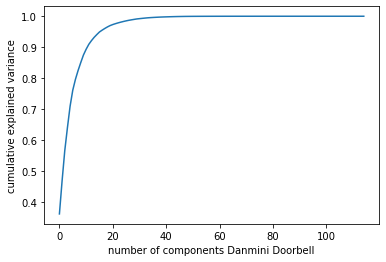

In [48]:
X = danmini_doorbell_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Danmini Doorbell')
plt.ylabel('cumulative explained variance');

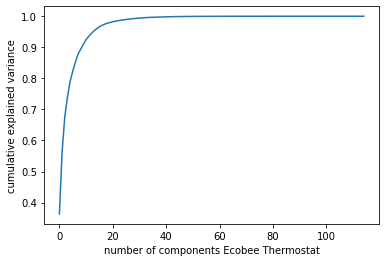

In [49]:
X = ecobee_thermostat_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Ecobee Thermostat')
plt.ylabel('cumulative explained variance');

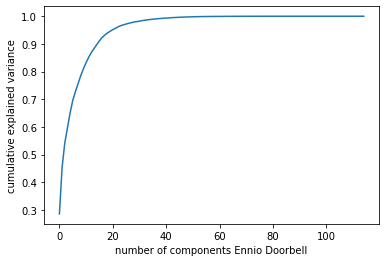

In [50]:
X = ennio_doorbell_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Ennio Doorbell')
plt.ylabel('cumulative explained variance');

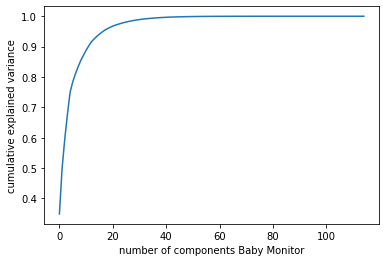

In [51]:
X = baby_monitor_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Baby Monitor')
plt.ylabel('cumulative explained variance');

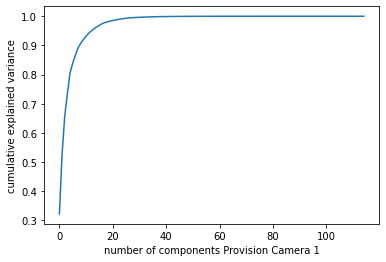

In [52]:
X = provision_cam1_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Provision Camera 1')
plt.ylabel('cumulative explained variance');

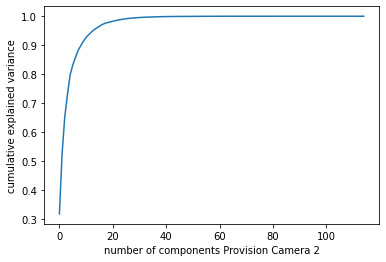

In [53]:
X = provision_cam2_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Provision Camera 2')
plt.ylabel('cumulative explained variance');

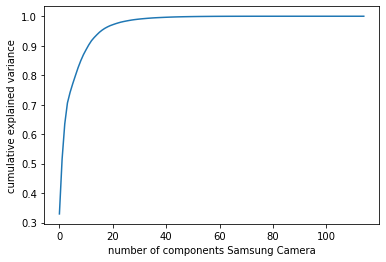

In [54]:
X = samsung_cam_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Samsung Camera')
plt.ylabel('cumulative explained variance');

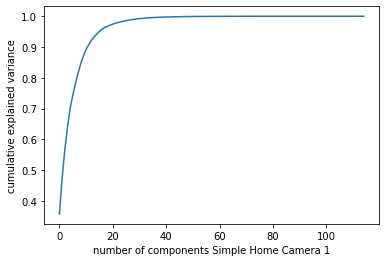

In [55]:
X = simplehome_cam1_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Simple Home Camera 1')
plt.ylabel('cumulative explained variance');

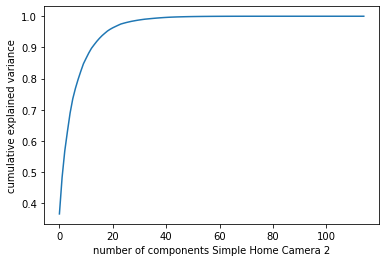

In [56]:
X = simplehome_cam2_df.drop(['label','device'], axis=1).values
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Simple Home Camera 2')
plt.ylabel('cumulative explained variance');

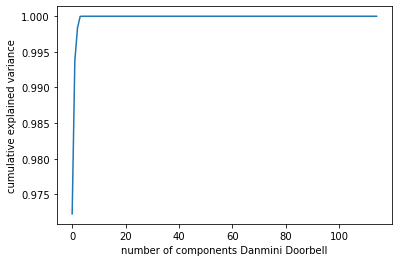

In [15]:
X = danmini_doorbell_df.drop(['label','device'], axis=1).values
pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components Danmini Doorbell')
plt.ylabel('cumulative explained variance');

### Results

----------------------------------------------------
#### Random Forest Classifier
----------------------------------------------------

| Device                                        | All Data - No Scaling - 3 Class | All Data - Standard Scaling - 3 Class | Under sampled data- No scaling - 3 class | Under sampled data- Standard scaling - 3 class | All Data - No Scaling - 11 Class | All Data - Standard Scaling - 11 Class | Under sampled data- No scaling - 11 class | Under sampled data- Standard scaling - 11 class |
| --------------------------------------------- | ------------------------------- | ------------------------------------- | ---------------------------------------- | ---------------------------------------------- | -------------------------------- | -------------------------------------- | ----------------------------------------- | ----------------------------------------------- |
| Danmin DoorBell                               | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 1.0                              | 0.878                                  | 1.0                                       | 0.878                                           |
| Ecobee_Thermostat                             | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.998                            | 0.848                                  | 0.988                                     | 1.0                                             |
| Ennio_Doorbell                                | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.992                            | 0.621                                  | 0.983                                     | 0.776                                           |
| Philips_B120N10_Baby_Monitor                  | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.997                            | 0.886                                  | 0.989                                     | 1.0                                             |
| Provision_PT_737E_Security_Camera             | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.993                            | 0.833                                  | 0.981                                     | 0.878                                           |
| Provision_PT_838_Security_Camera              | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 1.0                              | 0.857                                  | 1.0                                       | 1.0                                             |
| Samsung_SNH_1011_N_Webcam                     | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.999                            | 0.650                                  | 0.998                                     | 0.778                                           |
| SimpleHome_XCS7_1002_WHT_Security_Camera      | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 1.0                              | 0.862                                  | 1.0                                       | 0.877                                           |
| SimpleHome_XCS7_1003_WHT_Security_Camera      | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.993                            | 0.847                                  | 0.970                                     | 1.0                                             |

------------------------------------------
#### Decision Tree
------------------------------------------

| Device                                        | All Data - No Scaling - 3 Class | All Data - Standard Scaling - 3 Class | Under sampled data- No scaling - 3 class | Under sampled data- Standard scaling - 3 class | All Data - No Scaling - 11 Class | All Data - Standard Scaling - 11 Class | Under sampled data- No scaling - 11 class | Under sampled data- Standard scaling - 11 class |
| --------------------------------------------- | ------------------------------- | ------------------------------------- | ---------------------------------------- | ---------------------------------------------- | -------------------------------- | -------------------------------------- | ----------------------------------------- | ----------------------------------------------- |
| Danmin DoorBell                               | 1.0                             | 0.999                                 | 1.0                                      | 1.0                                            | 0.865                            | 0.744                                  | 0.574                                     | 0.453                                           |
| Ecobee_Thermostat                             | 0.997                           | 0.997                                 | 1.0                                      | 1.0                                            | 0.925                            | 0.775                                  | 0.770                                     | 0.770                                           |
| Ennio_Doorbell                                | 0.999                           | 0.999                                 | 1.0                                      | 1.0                                            | 0.945                            | 0.574                                  | 0.983                                     | 0.776                                           |
| Philips_B120N10_Baby_Monitor                  | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.857                            | 0.746                                  | 0.878                                     | 0.877                                           |
| Provision_PT_737E_Security_Camera             | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.781                            | 0.621                                  | 0.859                                     | 0.756                                           |
| Provision_PT_838_Security_Camera              | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.799                            | 0.656                                  | 0.877                                     | 0.877                                           |
| Samsung_SNH_1011_N_Webcam                     | 1.0                             | 1.0                                   | 1.0                                      | 1.0                                            | 0.892                            | 0.611                                  | 0.998                                     | 0.778                                           |
| SimpleHome_XCS7_1002_WHT_Security_Camera      | 0.996                           | 0.996                                 | 1.0                                      | 1.0                                            | 0.913                            | 0.775                                  | 0.648                                     | 0.648                                           |
| SimpleHome_XCS7_1003_WHT_Security_Camera      | 0.997                           | 0.997                                 | 1.0                                      | 1.0                                            | 0.915                            | 0.770                                  | 0.847                                     | 0.877                                           |

In [22]:
danmini_doorbell_df = load_data(base_directory, file_extension, 'Danmini_Doorbell')

In [23]:
danmini_doorbell_df['label'].value_counts()

mirai     652100
gafgyt    316650
benign     49548
Name: label, dtype: int64

In [24]:
danmini_doorbell_df['device'].value_counts()

Danmini_Doorbell    1018298
Name: device, dtype: int64

In [25]:
validationdata = danmini_doorbell_df.sample(frac=0.15)

In [26]:
validationdata.shape

(152745, 117)

In [27]:
X_validation = validationdata.drop(['label', 'device'], axis=1)

In [28]:
y_validation = validationdata['label']

In [29]:
danmini_doorbell_df = danmini_doorbell_df.drop(validationdata.index)

In [30]:
danmini_doorbell_df.shape

(865553, 117)

In [31]:
X = danmini_doorbell_df.drop(['label', 'device'], axis=1)
y = danmini_doorbell_df['label']
print(f'Original Shape:{X.shape}, {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
   
    
clf = RandomForestClassifier()
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print(importances.head(20))
    
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: Confusion Matrix', cm)
print('Random Forest : Classification Report',classification_report(y_test, y_pred))

model_name = f'test_without_scaling_unbalanced_model.pkl'
    
best_model = clf
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.build_datetime = datetime.now()
    
modelpath = 'models'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
iotmodel_path = os.path.join(modelpath, model_name)
if not os.path.exists(iotmodel_path):
    with open(iotmodel_path, 'wb') as f:
        pickle.dump(best_model, f)
        
print('---------------------- Done ---------------------')

Original Shape:(865553, 115), (865553,)
                     importance
feature                        
H_L0.1_weight             0.077
MI_dir_L0.01_weight       0.073
MI_dir_L0.1_weight        0.054
H_L0.01_weight            0.050
MI_dir_L3_weight          0.045
H_L1_weight               0.040
MI_dir_L1_weight          0.039
HH_jit_L3_weight          0.034
MI_dir_L0.01_mean         0.034
H_L0.01_mean              0.029
HH_L1_weight              0.027
MI_dir_L0.1_mean          0.026
H_L3_weight               0.024
H_L0.1_mean               0.024
MI_dir_L5_weight          0.023
HH_jit_L1_weight          0.022
HH_L3_weight              0.022
H_L5_weight               0.021
HH_L5_weight              0.019
HH_jit_L3_mean            0.019
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[ 12760      0      0]
 [     1  80082      0]
 [     0      0 166823]]
Random Forest : Classification Report               precision    recall  f1-score   support

In [33]:
# This isn't exactly production-grade, but a quick check for development
# These checks can save some head-scratching in development when moving from
# one python environment to another, for example
expected_model_version = 1.0
model_path = 'models/test_without_scaling_unbalanced_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [34]:
from sklearn.model_selection import cross_validate

In [36]:
y_pred = model.predict(X_validation)
y_pred_prob = model_res.predict_proba(X_validation)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_validation, y_pred)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

f1 = f1_score(y_validation, y_pred, average='weighted')
cm = confusion_matrix(y_validation, y_pred)
print(importances.head(20))
    
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: Confusion Matrix', cm)
print('Random Forest : Classification Report',classification_report(y_validation, y_pred))

print('---------------------- Done ---------------------')

                     importance
feature                        
H_L0.1_weight             0.077
MI_dir_L0.01_weight       0.073
MI_dir_L0.1_weight        0.054
H_L0.01_weight            0.050
MI_dir_L3_weight          0.045
H_L1_weight               0.040
MI_dir_L1_weight          0.039
HH_jit_L3_weight          0.034
MI_dir_L0.01_mean         0.034
H_L0.01_mean              0.029
HH_L1_weight              0.027
MI_dir_L0.1_mean          0.026
H_L3_weight               0.024
H_L0.1_mean               0.024
MI_dir_L5_weight          0.023
HH_jit_L1_weight          0.022
HH_L3_weight              0.022
H_L5_weight               0.021
HH_L5_weight              0.019
HH_jit_L3_mean            0.019
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[ 7471     0     0]
 [    1 47531     0]
 [    0     0 97742]]
Random Forest : Classification Report               precision    recall  f1-score   support

      benign       1.00      1.00      1.00    

#### Load All data

In [4]:
df = load_data_class(base_directory, file_extension)

In [5]:
df.shape

(1059391, 117)

In [5]:
def rf_classifier(data, scaling=False,):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        model_name = f'generic_without_scaling_unbalanced_model.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'generic_with_scaling_unbalanced_model.pkl'
    
    clf = RandomForestClassifier()
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [7]:
rf_classifier(df)

Original Shape:(1059391, 115), (1059391,)
                     importance
feature                        
MI_dir_L1_weight          0.055
H_L0.1_weight             0.052
MI_dir_L0.1_weight        0.051
MI_dir_L0.01_weight       0.045
H_L5_variance             0.036
H_L1_weight               0.033
MI_dir_L3_weight          0.030
H_L0.01_weight            0.026
MI_dir_L0.01_mean         0.026
HH_jit_L3_weight          0.025
HH_jit_L0.1_mean          0.024
HH_L0.01_magnitude        0.024
HH_jit_L1_weight          0.024
H_L0.1_mean               0.022
HH_L1_weight              0.022
MI_dir_L0.1_mean          0.021
HH_L0.1_magnitude         0.021
MI_dir_L1_mean            0.019
HH_jit_L5_mean            0.019
H_L0.01_variance          0.019
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[ 25003      1      0]
 [     2 127683      0]
 [     1      0 165128]]
Random Forest : Classification Report               precision    recall  f1-score   suppo

In [3]:
df_multi = load_data_all_multi(base_directory, file_extension)

In [4]:
df_multi.shape

(1059391, 117)

In [6]:
rf_classifier(df_multi)

Original Shape:(1059391, 115), (1059391,)
                       importance
feature                          
MI_dir_L0.01_mean           0.051
HH_jit_L5_mean              0.048
HH_jit_L0.1_mean            0.045
HH_jit_L0.01_mean           0.043
HH_jit_L3_mean              0.042
H_L0.01_mean                0.042
MI_dir_L0.01_variance       0.036
H_L0.01_variance            0.034
HH_jit_L1_mean              0.033
MI_dir_L0.1_mean            0.033
MI_dir_L0.01_weight         0.032
H_L0.01_weight              0.029
H_L0.1_mean                 0.029
H_L0.1_weight               0.026
MI_dir_L1_mean              0.024
MI_dir_L0.1_weight          0.022
HH_L0.01_magnitude          0.020
H_L1_mean                   0.020
MI_dir_L0.1_variance        0.019
HH_L0.1_magnitude           0.017
Random Forest: Accuracy=0.997
Random Forest: f1-score=0.997
Random Forest: Confusion Matrix [[25003     0     0     0     0     0     0     1     0     0     0]
 [    0 23161     2     0     0     0     0     0